# Problem 2 (i)

In [22]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

## Define the transfer function

In [23]:
s = ct.TransferFunction.s
G = (0.5*s + 1) / (s + 1)**3 / (0.1*s + 1)
G

TransferFunction(array([0.5, 1. ]), array([0.1, 1.3, 3.3, 3.1, 1. ]))

## Part (i) The first Ziegler-Nichols method

### Plotting the unit step response

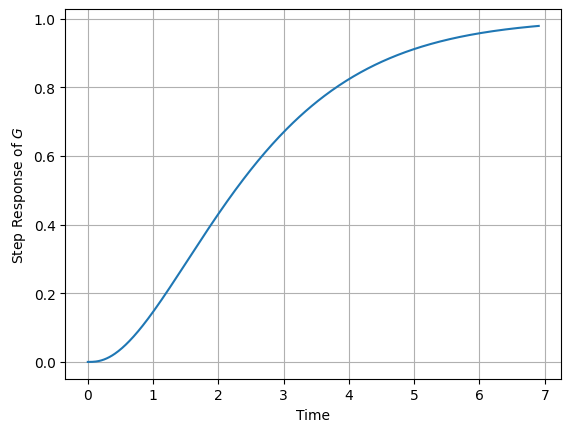

In [24]:
# Compute and plot the step response of G
stepRes = ct.step_response(G)
plt.plot(stepRes.time, stepRes.outputs)
plt.xlabel('Time')
plt.ylabel('Step Response of $G$')
plt.grid()
plt.show()

### Finding the inflection point and computing $A$, $L$, $T$ & $R$

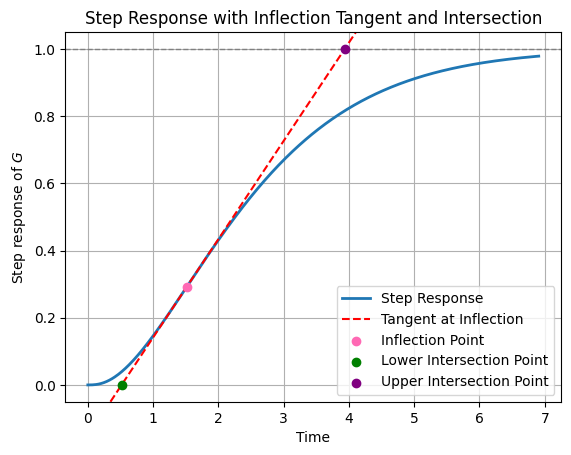

Inflection Point: t = 1.517, y = 0.292
Lower intersection Point: t = 0.517, y = 0.000
Upper intersection Point: t = 3.936, y = 1.000
A = 1.0
L = 0.5174737584489387
T = 3.41850217154738
R = 0.2925257758567845


In [25]:
### Main ###
# Compute first and second derivatives
dy_dt = np.gradient(stepRes.outputs, stepRes.time)
d2y_dt2 = np.gradient(dy_dt, stepRes.time)

# Finding inflection points
inflectionPoint = np.nonzero(np.diff(np.sign(d2y_dt2)))[0]
t_inflection = stepRes.time[inflectionPoint]
y_inflection = stepRes.outputs[inflectionPoint]
slope_inflection = dy_dt[inflectionPoint]
#   Finding y-intercept of the tangent
c_inflection = y_inflection - slope_inflection * t_inflection

# Find intersection of two lines
def intersection_func(m1, b1, m2, b2):
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return (x, y)

# Find intersection points
(l_t_intersect, l_y_intersect) = intersection_func(slope_inflection, c_inflection, 0, 0)
(u_t_intersect, u_y_intersect) = intersection_func(slope_inflection, c_inflection, 0, 1)

# Compute A, L, t & R
a = u_y_intersect - l_y_intersect
l = l_t_intersect
t = u_t_intersect - l_t_intersect
r = a / t

### Outputs ###
# Plot step response
plt.plot(stepRes.time, stepRes.outputs, label='Step Response', linewidth=2)
plt.axline((float(t_inflection[0]), float(y_inflection[0])), slope=float(slope_inflection[0]), color='red', linestyle='--', label='Tangent at Inflection')
plt.scatter(t_inflection, y_inflection, color='hotpink', label='Inflection Point', zorder=3)
plt.scatter(l_t_intersect, l_y_intersect, color='green', label='Lower Intersection Point', zorder=3)
plt.scatter(u_t_intersect, u_y_intersect, color='purple', label='Upper Intersection Point', zorder=3)

# Labels and legend
plt.xlabel('Time')
plt.ylabel('Step response of $G$')
plt.title('Step Response with Inflection Tangent and Intersection')
plt.axhline(1, color='gray', linestyle='--', linewidth=1)  # Steady-state value
plt.legend()
plt.grid()
plt.show()

# Print results
print(f'Inflection Point: t = {float(t_inflection[0]):.3f}, y = {float(y_inflection[0]):.3f}')
print(f'Lower intersection Point: t = {float(l_t_intersect[0]):.3f}, y = {float(l_y_intersect[0]):.3f}')
print(f'Upper intersection Point: t = {float(u_t_intersect[0]):.3f}, y = {float(u_y_intersect[0]):.3f}')
print(f'A = {float(a[0])}')
print(f'L = {float(l[0])}')
print(f'T = {float(t[0])}')
print(f'R = {float(r[0])}')

### PID controller Tuning

In [26]:
# Based on the parameters in Table 10.2 in Section 10.3.2
Kc = 1.2 / (r * l)
tauI_zn1 = 2*l
tauD_zn1 = 0.5*l
print(Kc)
print(tauI_zn1)
print(tauD_zn1)

[7.92736354]
[1.03494752]
[0.25873688]


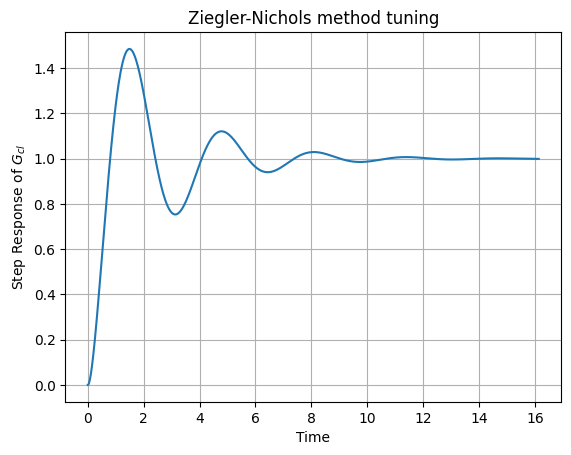

In [27]:
Gpid_zn1 = Kc * (1 + tauD_zn1 * s + 1 / (tauI_zn1 * s))
Gcl_zn1 = ct.feedback(ct.series(Gpid_zn1, G), 1)
stepRes = ct.step_response(Gcl_zn1)
plt.plot(stepRes.time, stepRes.outputs)
plt.xlabel('Time')
plt.ylabel('Step Response of $G_{cl}$')
plt.title('Ziegler-Nichols method tuning')
plt.grid()
plt.show()

## Part (ii) Ziegler-Nichols ultimate sensitivity method

### Determine ultimate gain/period

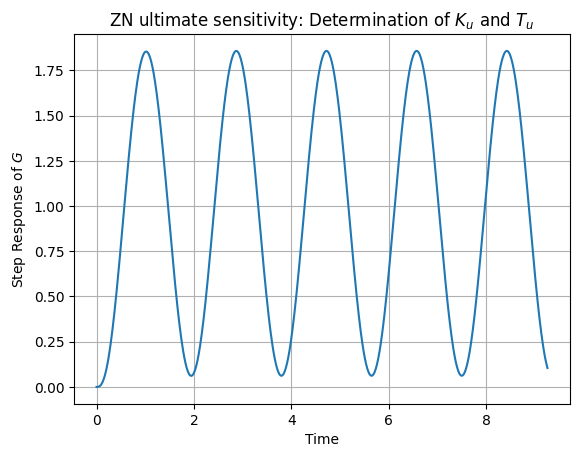

In [112]:
# k is determined experimentally
ku = 23.7405861
Gcl = ct.feedback(ku*G, 1)
stepRes = ct.step_response(Gcl)
plt.plot(stepRes.time, stepRes.outputs)
plt.xlabel('Time')
plt.ylabel('Step Response of $G$')
plt.title('ZN ultimate sensitivity: Determination of $K_u$ and $T_u$')
plt.grid()
plt.show()

In [29]:
# Find ultimate period
dy_dt = np.gradient(stepRes.outputs, stepRes.time)
d2y_dt2 = np.gradient(dy_dt, stepRes.time)
inflectionPoint = np.nonzero(np.diff(np.sign(d2y_dt2)))[0]
tu = stepRes.time[inflectionPoint[9]] - stepRes.time[inflectionPoint[8]]
tu

np.float64(0.9245276607175326)

### PID controller tuning

105.85879860817802
0.4622638303587663
0.11556595758969157


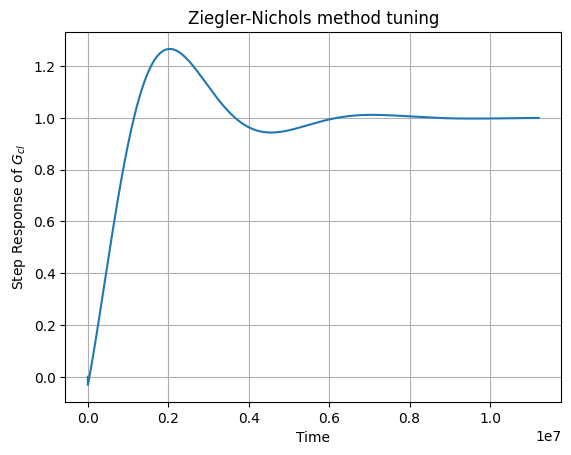

In [106]:
# Based on the parameters in Table 10.3 in Section 10.3.3
kp       = 4.45898 * ku
tauI_znu = tu / 2
tauD_znu = tu / 8

print(kp)
print(tauI_znu)
print(tauD_znu)

Gpid_znu = kp * (1 + tauD_znu * s + 1 / (tauI_znu * s))
Gcl_znu  = ct.feedback(ct.series(Gpid_znu, G), 1)
stepRes  = ct.step_response(Gcl_znu)
plt.plot(stepRes.time, stepRes.outputs)
plt.xlabel('Time')
plt.ylabel('Step Response of $G_{cl}$')
plt.title('Ziegler-Nichols method tuning')
plt.grid()
plt.show()